In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [2]:
#importing csv fiC:\Users\satvi\OneDrive\Desktop\baseballle
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


After looking into the dataset all the columns in the dataset is in numeric values, there are no categorical columns in the dataset.The dataset contains of both features and label.In this the label is 'W' which is number of wins made by the baseball teams that is what we need to predict

### Data PreProcessing(Data Cleaning)

In [3]:
#checking for the shape of the data
data.shape

(30, 17)


From shape method we can know that there are 30 rows and 17 columns

In [4]:
#checking for nulls
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

After seeing the null method we got to know that there are no null values in the dataset

In [5]:
#checking for info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In the dataset all the columns are of integer type only one column ERA has float type ERA stands for Earn Run average since it is a mean value so it is in float type

In [6]:
#checking for stats
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000



From stats we can see that the minimum no of wins of a team are 63,The average wins are 80,the maximum wins are 100 in the same way we can corelate for other columns.In all the columns the data seems to be normally distributed comparing with one stats with the other there is no much skewness in the data but later we will check the skewness by using some of the visualisation techniques.

In [7]:
#Checking for uniqueness in the data
data.apply(lambda x: len(x.unique()))

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [8]:
data.shape

(30, 17)

### Exploratory Data Analysis

#Winning requirements

Winning Percentage = b0+ b1 (total payroll) +b2 (home wins) + b3 (home losses) + b3 (road 
wins) + b4 (road losses) + b5 (fielding percentage) + b6 (runs per game allowed) + b7 (total 
earned runs allowed) + b8 (earned run average of pitchers) +b9 (strikeouts) + b10 (walks) + b11
(errors) + b12 (runs per game scored) + b13(total runs scored) + b14 (hits) + b15 (home runs) + 
b16 (runs batted in) +b17 (stolen bases) + b18 (batting average) + b19 (on base percentage) + b20
(slugging percentage) + b21(total fan attendance) + b22 (stadium capacity)

We have some of them features for getting the predicted label.But some of them are missing ,By using some of the data from our features lets create some more columns which are important for our prediction and see how the dataset changes accordingly.

In [9]:
# Batting Average
#Creating extra column Batting Average it means no of hits divided by at bats
data['BA']=data['H']/data['AB']

Batting average is the number of hits divided by at bats so we found the Ba and dropped the columns of H and AB

In [10]:
#Singles
# H is the number of hits which is the combination of 1b,2b,3b,home runs 
data['1B']=data['H']-(data['2B']+data['3B']+data['HR'])

Finding singles inorder to find total bases the singles is missing in the columns hits is the combination of singles,doubles,triples so by using others information am finding singles which is an extra column

H is the number of hits which is the combination of 1b,2b,3b,home runs so from them am finding 1B Because for wins 1B is enough for a batsman the 2B,3B,home runs are important beacuse that decides weather he have played all the games are not but for our prediction only 1B is enough so dropping remaining column.


In [11]:
#Total Bases 
#adding extra columns which increases the winning rate
data['Total Bases']=(1*data['1B']+2*data['2B']+3*data['3B']+4*data['HR'])

Total Bases is calculated as total bases divided by at bats

In [12]:
#Slagging%
data['slagging%']=data['Total Bases']/data['AB']

Slagging is measured by using total bases and At bats,It is the division between Total Bases by At Bats

In [13]:
#Dropping the columns which are not used for prediction
data.drop(columns=['2B','3B','1B','Total Bases','CG','SV','SHO'],axis=1,inplace=True)

Above are listed features which are required for our label prediction so after considering them what all the features required am keeping them and dropping the other features which are not required for the prediction

In [14]:
data.head()

,W,R,AB,H,HR,BB,SO,SB,RA,ER,ERA,E,BA,slagging%
0,95,724,5575,1497,139,383,973,104,641,601,3.73,88,0.268520,0.412197
1,83,696,5467,1349,156,439,1264,70,700,653,4.07,86,0.246753,0.399122
2,81,669,5439,1395,141,533,1157,86,640,584,3.67,79,0.256481,0.400625
3,76,622,5533,1381,136,404,1231,68,701,643,3.98,101,0.249593,0.380083
4,74,689,5605,1515,151,455,1259,83,803,746,4.64,86,0.270294,0.420161


In [15]:
data.shape

(30, 14)

### Visualisation

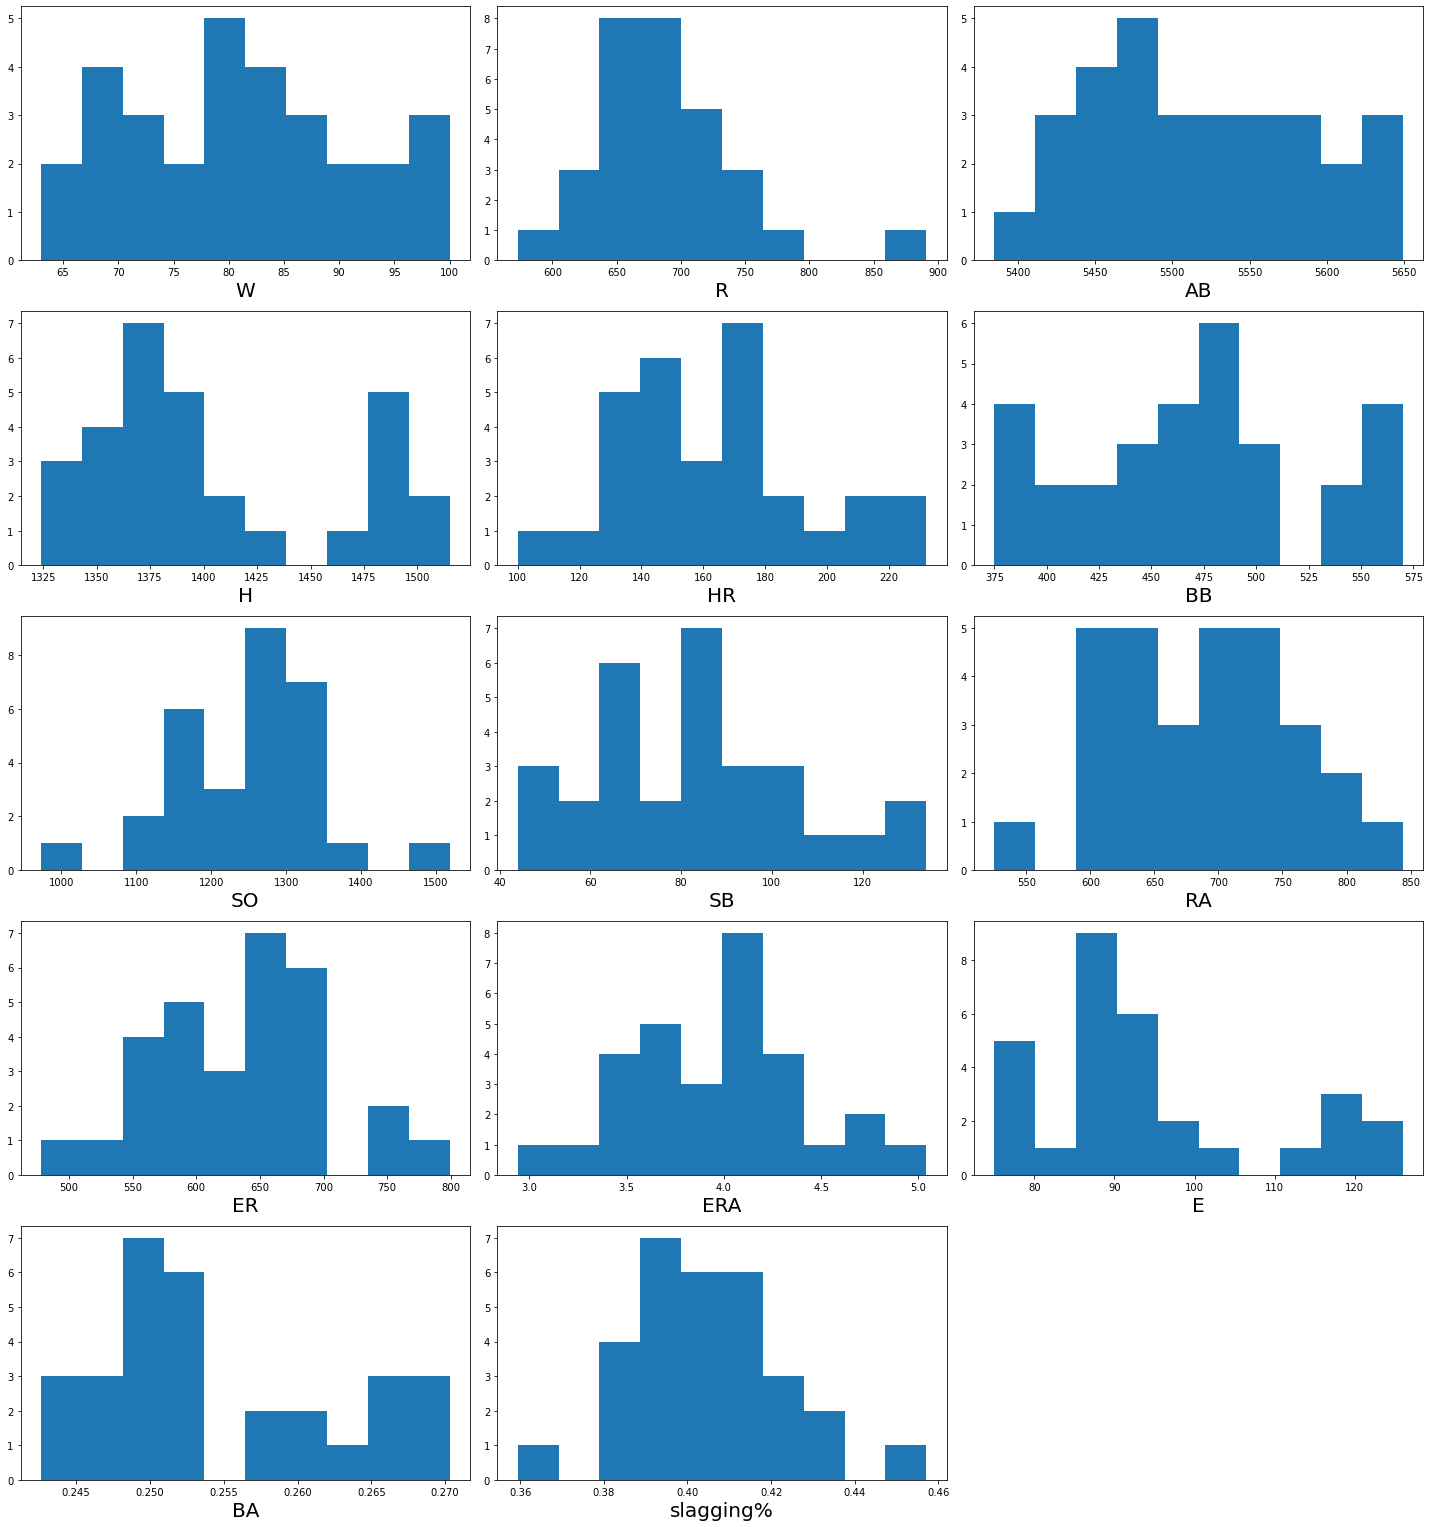

In [16]:
#Lets check the distribution of the data in the columns using distribution plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        plt.hist(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


From histogram plot we can see how the data distributed in columns the max and min values of the particualr data can be seen by using histogram plot.

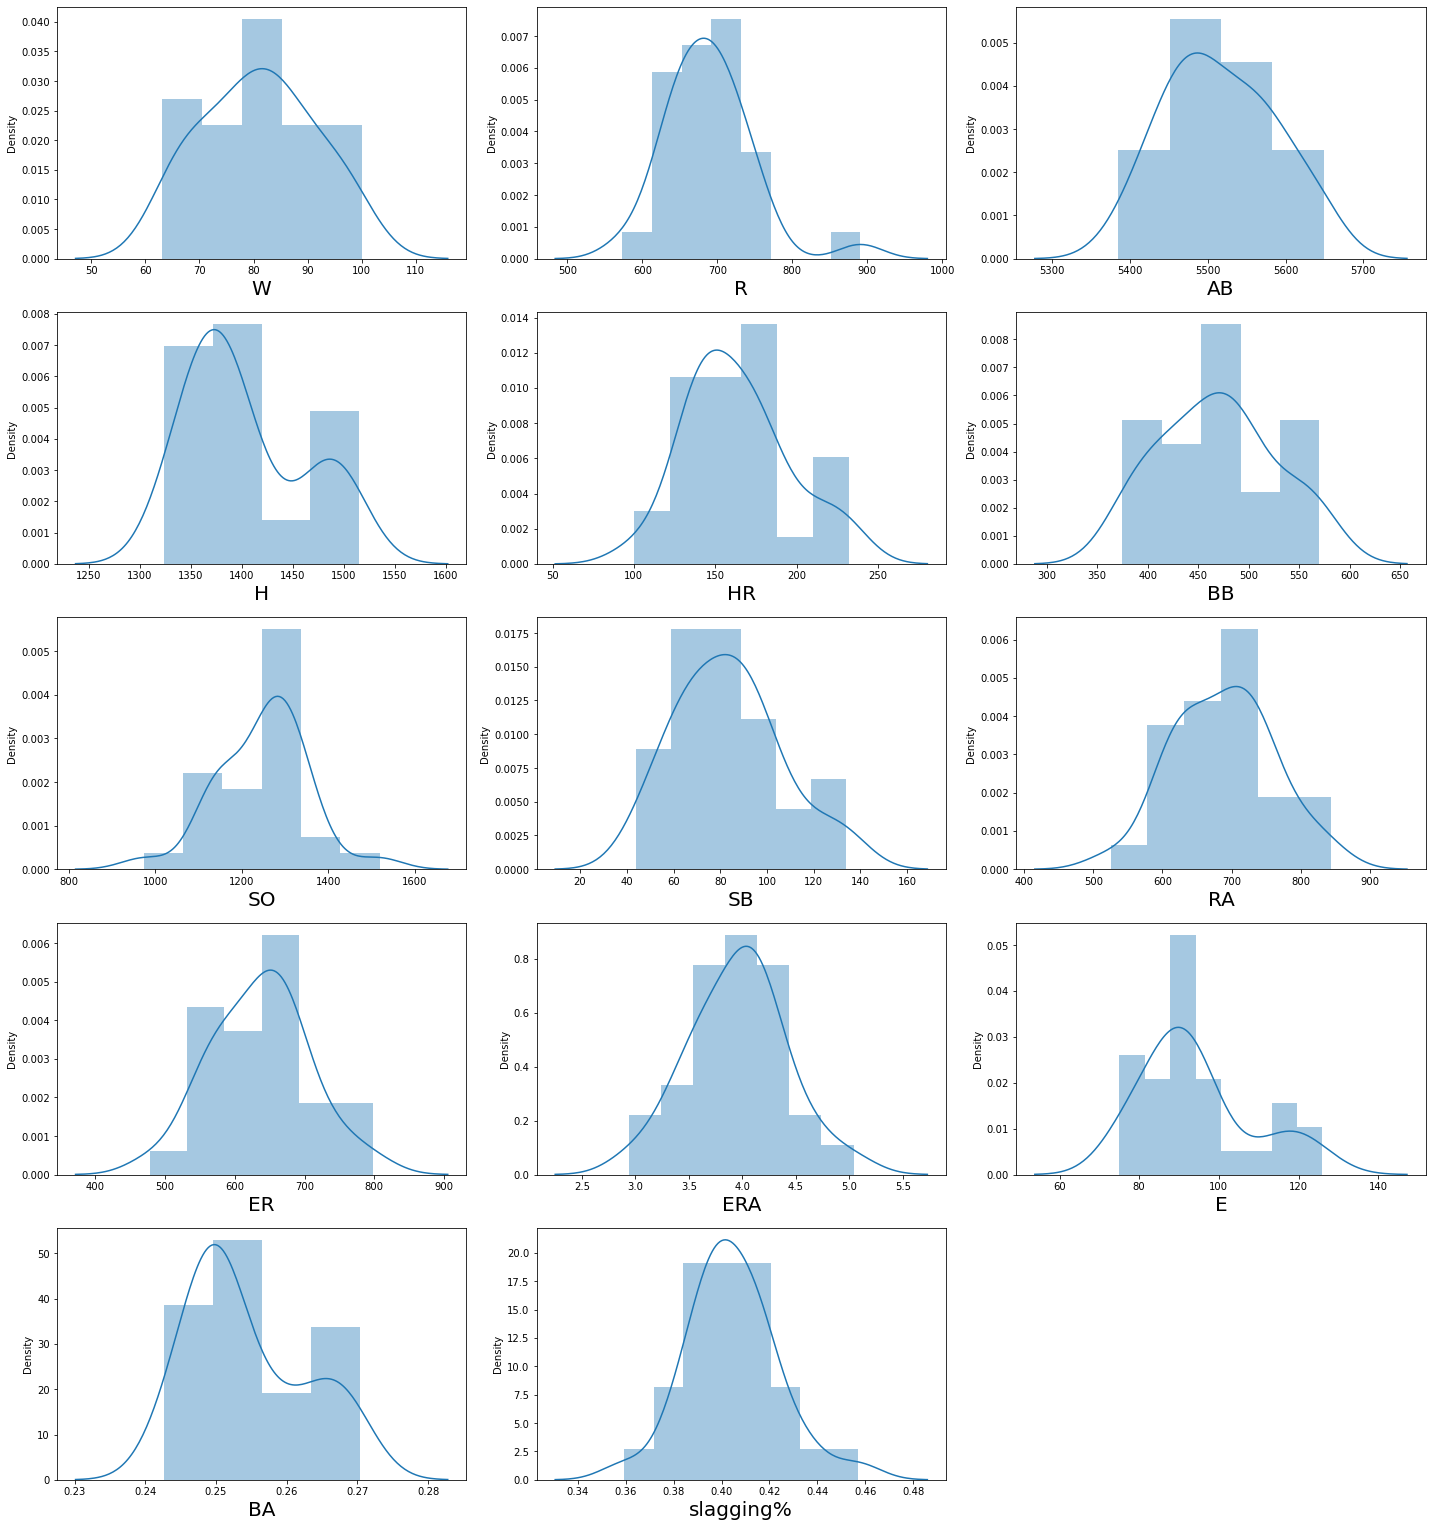

In [17]:
#Lets check the distribution of the data in the columns using distribution plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


The data seems to be normally distributed there is only some skewness in the columns so lets go head and plot the box plot and visualise and check for the outliers

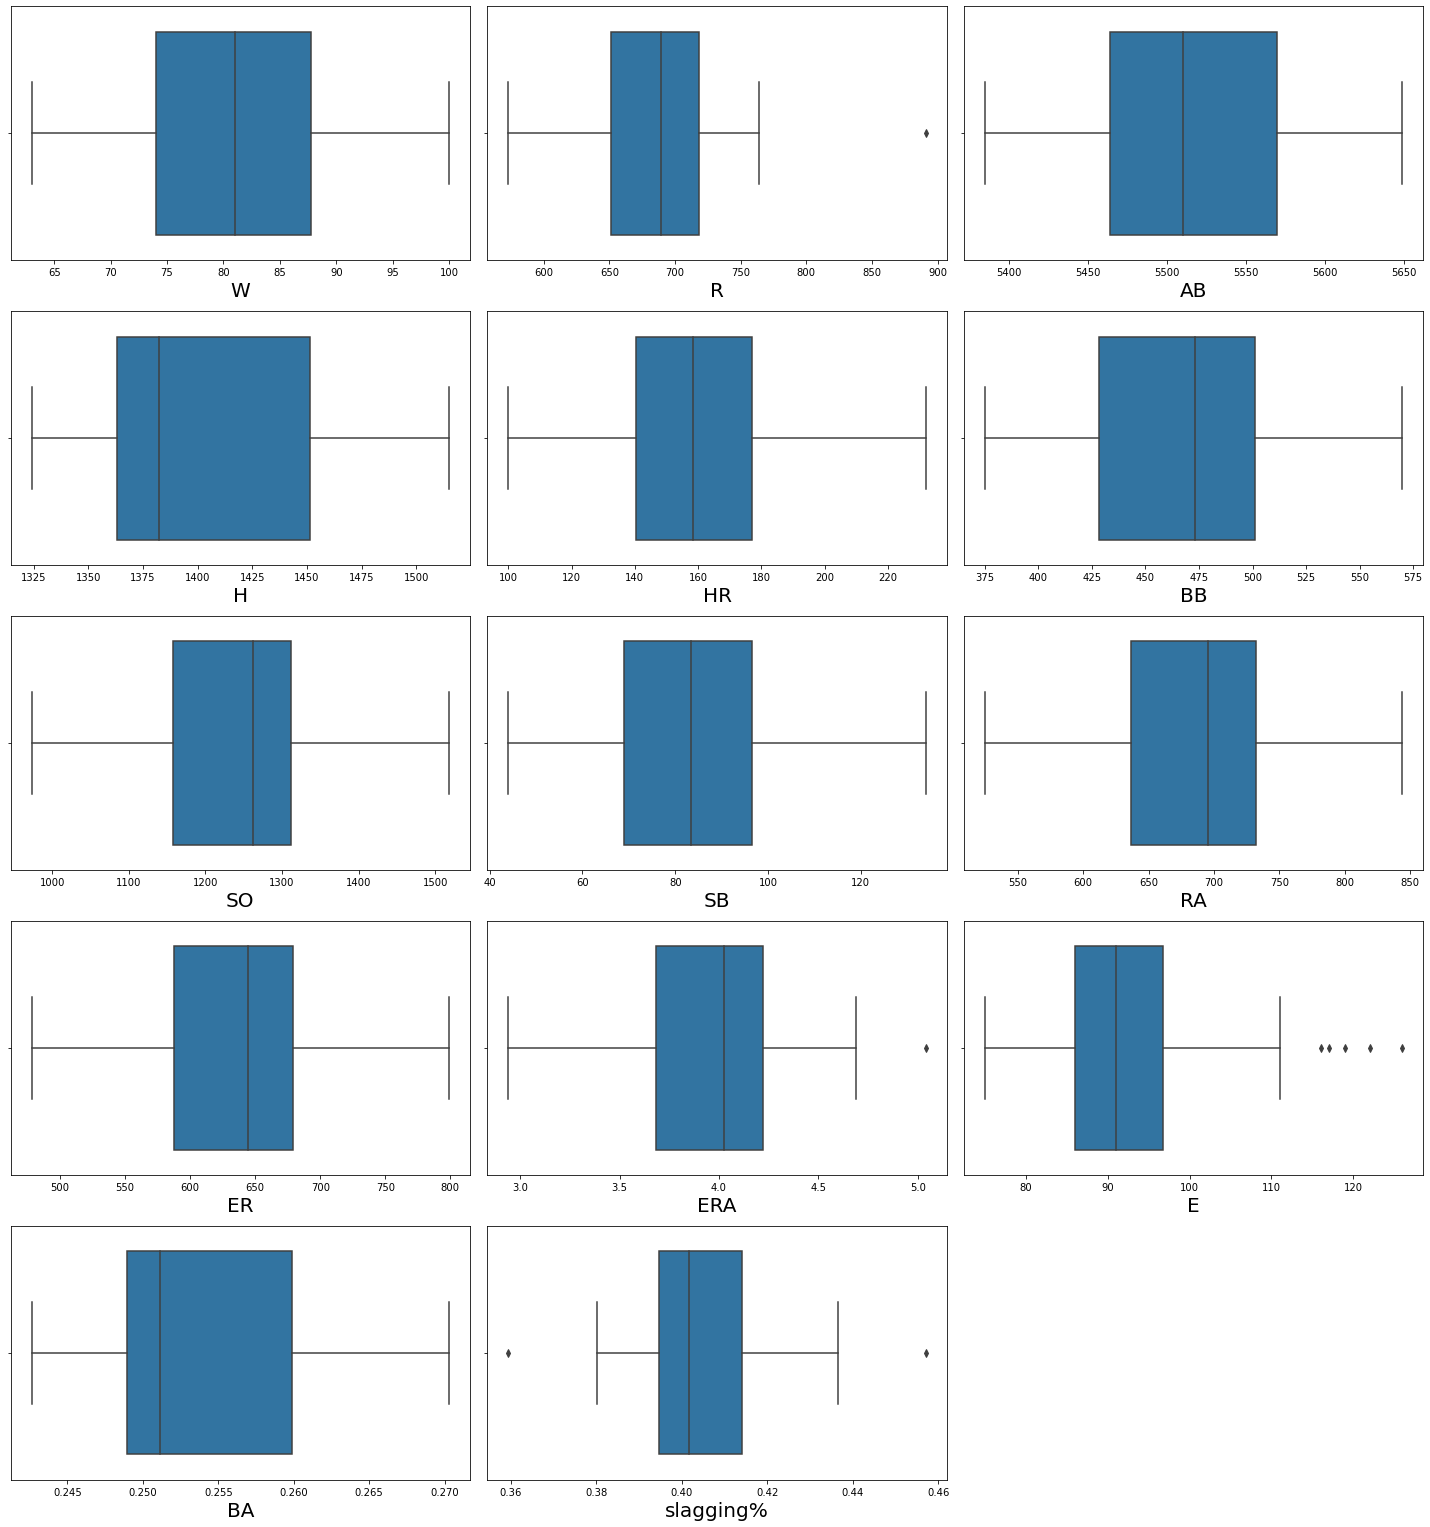

In [18]:
#Lets check the boxplot and visualise
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


There are some outliers present in some of the columns lets try removing the outliers using Z Score 

### Z Score

In [19]:
#importing the stats from the scipy library
from scipy import stats
#lets remove our ouliers using z_score
z=np.abs(stats.zscore(data))#abs=absolute numberprint(z)
print(z)

[[1.36540860e+00 6.19077968e-01 8.47731264e-01 1.66368512e+00
  7.87298598e-01 1.53490242e+00 2.69762957e+00 9.13883291e-01
  6.66233927e-01 5.05110079e-01 5.06955186e-01 4.61469635e-01
  1.75149719e+00 4.11027026e-01]
 [1.97838300e-01 1.34431656e-01 7.11093535e-01 9.70680764e-01
  2.43966683e-01 5.36591904e-01 1.54878442e-01 6.01825582e-01
  1.65970766e-01 2.48929848e-01 2.54597523e-01 6.07196888e-01
  9.44945867e-01 2.89358445e-01]
 [3.24325082e-03 3.32905860e-01 1.11523330e+00 1.51891367e-01
  7.23377196e-01 1.13914361e+00 8.93981893e-01 1.11449182e-01
  6.80339091e-01 7.51623132e-01 6.41346840e-01 1.11724227e+00
  2.60104670e-01 2.08843571e-01]
 [4.83244373e-01 1.14641931e+00 2.41521620e-01 4.01088140e-01
  8.83180700e-01 1.16053598e+00 1.68601848e-01 6.90984928e-01
  1.80075931e-01 1.03922169e-01 5.30100415e-02 4.85757510e-01
  5.93119815e-01 1.30918524e+00]
 [6.77839422e-01 1.32700776e-02 1.28073815e+00 1.98408098e+00
  4.03770187e-01 2.51360327e-01 1.05866277e-01 2.22898364e-02


In [20]:
#Rows having outliers more than 3 standard deviation
print('Row Numbers \n',np.where(z>3)[0])

Row Numbers 
 [5]


In [21]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [22]:
data.shape

(29, 14)

After checking the shape again there is a outlier present in only one row so that got deleted so now row shape got changed 

### Correlation 

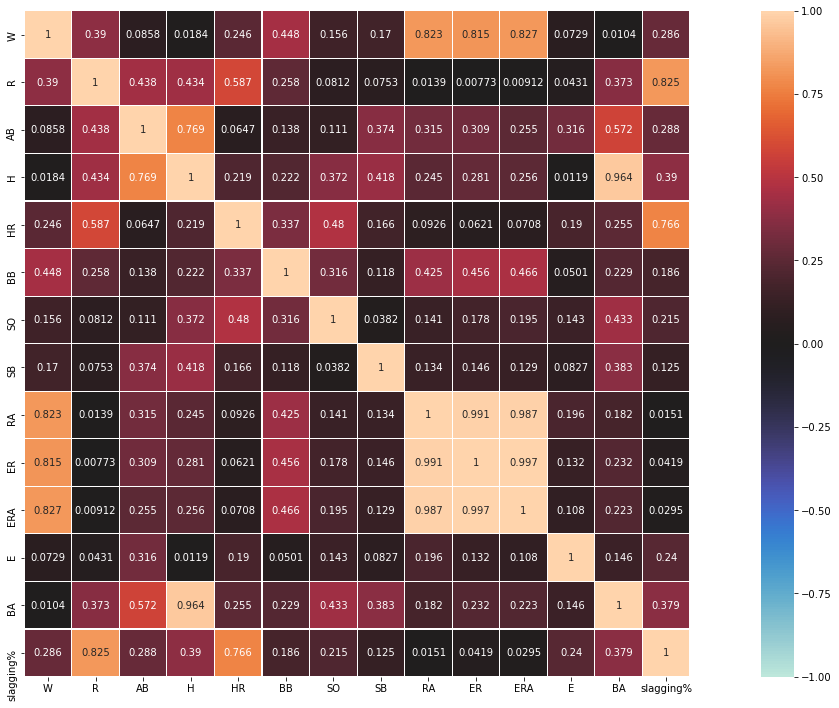

In [23]:

#Plotting the heat map to check the correlation with the features to features and label to features
df_corr=data.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.3g',linewidth=.1)
plt.tight_layout()

Our label is highly correlated with three features which are runs allowed,Earned runs,Earned average runs,saves and very lessely correlated with error.The feature to feature corrleation is present in Runs allowed,Earned average runs,Earned runs all tose are corelated with the labels and features,also there is a multicollinearity problem exis if the accuracy score is not good then i will go ahead and delete one of the column which is highly corelated with the other.CG is the feature which is very very less correlated with label.so that doesnot help us in model building am deledting that column too.

### Splitting Features and Label

In [24]:
#Am seperating the features and labels
#also in our data set there are features which are highly corelated with eath other am deleting that feature and a feature which is not corelated with label
x=data.drop(columns=['W'],axis=1)
y=data['W']

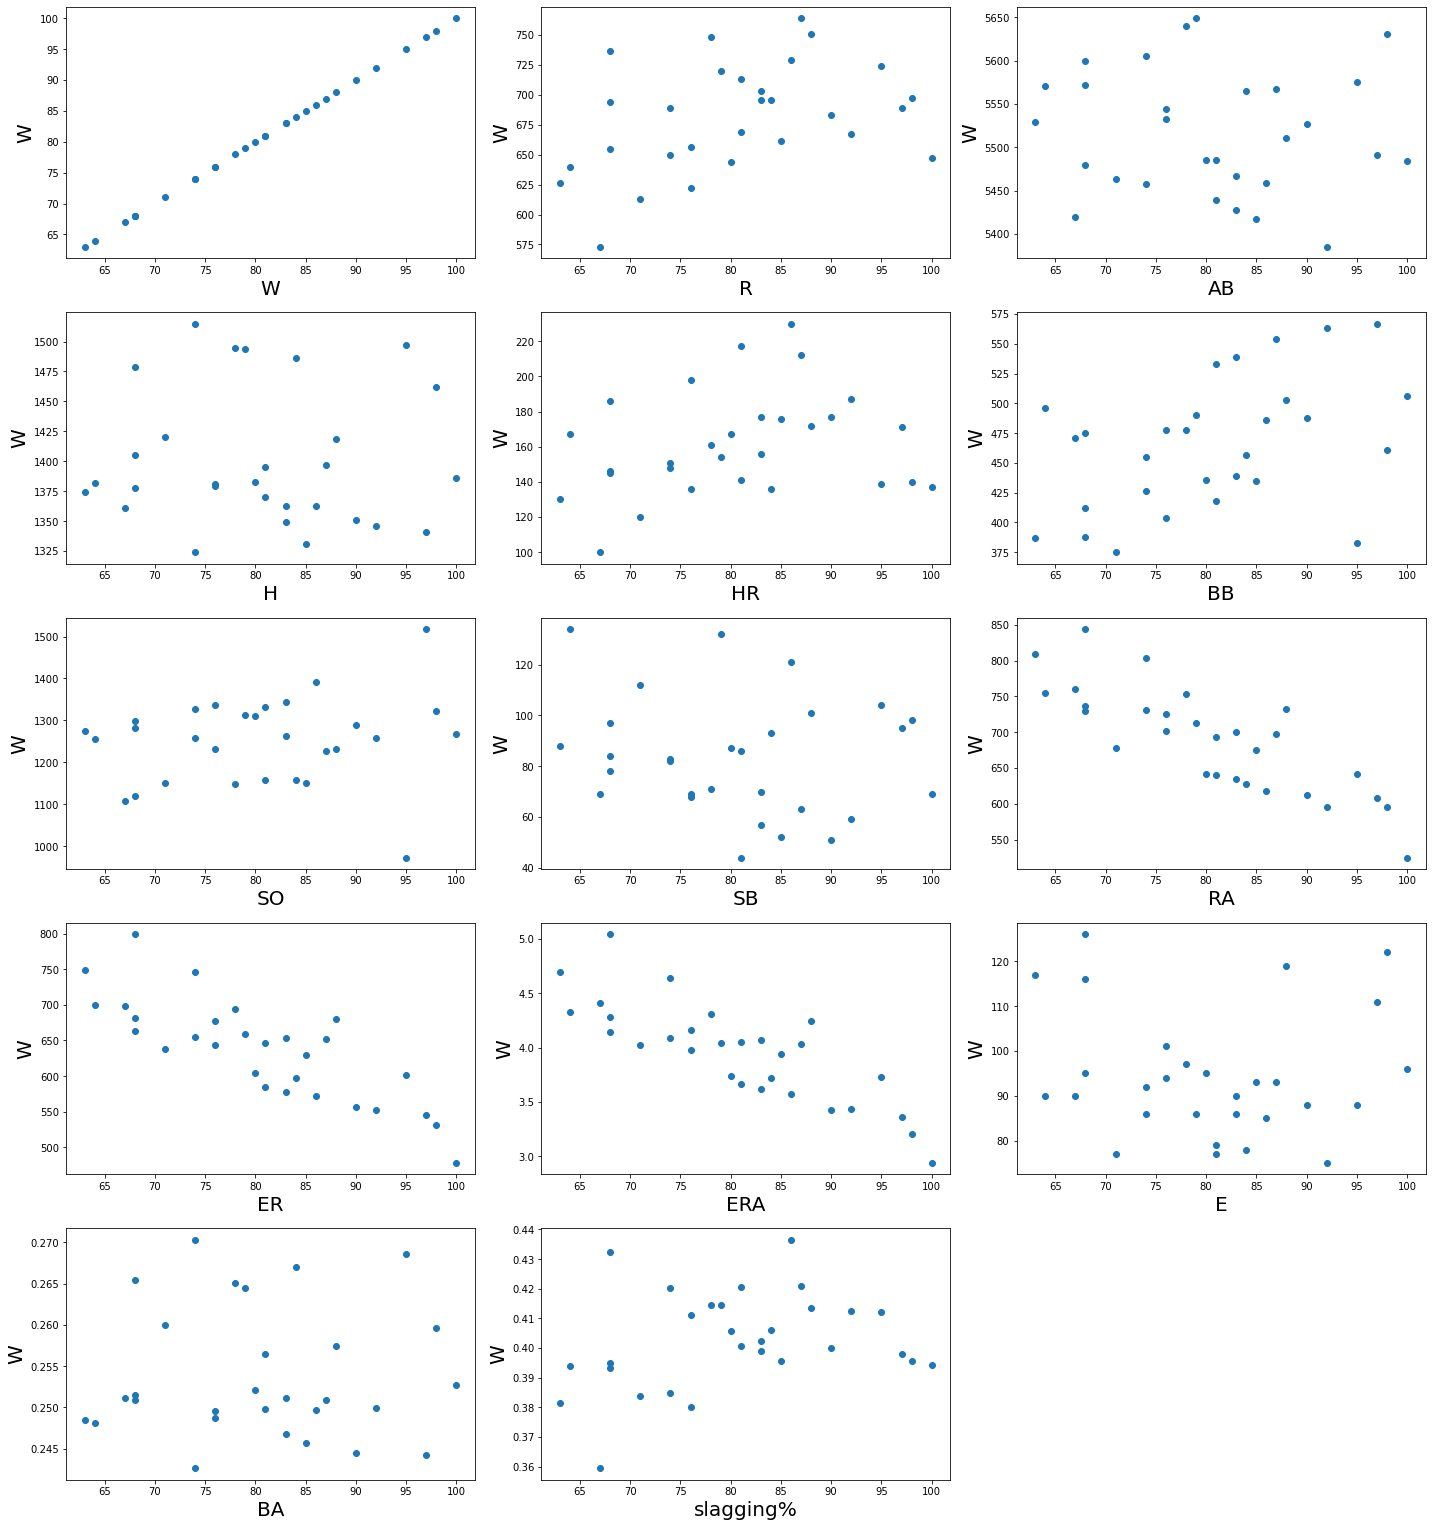

In [25]:
#plotting the histogram plot 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        plt.scatter(y,data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W',fontsize=20)
    plotnumber+=1
plt.tight_layout()



From scatter plot we can see the relation between the label and the columns.In some of the columns the label is highly correlated with the features.Label is highly correlated with Runs allowed,Earned runs,average earned runs so the data is falling from left to right which means highly correlated.But with the features slagging%,BB,HR the data points are falling from right to left which means there are less correlated.In remaining features the data is in random distribution which means there are not at all corelated with the label.

### SkewNess

In [26]:
#Checking for skewness in the data
x.skew()

R           -0.215364
AB           0.169573
H            0.783772
HR           0.450862
BB           0.151193
SO          -0.233815
SB           0.494966
RA           0.018155
ER           0.018461
ERA          0.016693
E            0.840271
BA           0.735645
slagging%   -0.253706
dtype: float64

The skewness should be in the range of -0.5 to +0.5 so which has more than 0.5 for that columns am applying log transformation.

### Data Transformation

In [27]:
#Applying log transformation
x['H']=np.log(1+x['H'])
x['E']=np.log(1+x['E'])
x['BA']=np.log(1+x['BA'])

### Scaling

In [28]:
#importing Standard Scaler
from sklearn.preprocessing import StandardScaler
#scailing the data
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.95939835,  0.83008422,  1.72372599, -0.76586314, -1.53635899,
        -2.72762331,  0.9059529 , -0.66451353, -0.51114812, -0.51138828,
        -0.43573324,  1.88268689,  0.58595253],
       [ 0.33114717, -0.70283074, -0.94984589, -0.18138864, -0.49502051,
         0.12189552, -0.58531515,  0.15463823,  0.23216082,  0.23895226,
        -0.59810993, -0.92161844, -0.2217725 ],
       [-0.27466646, -1.10025314, -0.08870013, -0.69710144,  1.25294051,
        -0.9258657 ,  0.11645805, -0.67839746, -0.75415297, -0.64380131,
        -1.19738162,  0.33763854, -0.12891809],
       [-1.32923093,  0.23395062, -0.34774692, -0.8690057 , -1.14585706,
        -0.20124579, -0.6730368 ,  0.16852216,  0.08921679,  0.04033271,
         0.53829069, -0.55295361, -1.39789573],
       [ 0.17408438,  1.25589393,  2.03070817, -0.35329291, -0.19749523,
         0.07293472, -0.01512442,  1.58468284,  1.56154027,  1.4968761 ,
        -0.59810993,  2.10913789,  1.07788184],
       [ 1.85690002,  0.716534

### Train Test Split

In [29]:
#splitting the data into train,test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=16)
    

### Regression Algorithms

In [30]:
#importing the algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
#lets import some of the evaluation metrics for classification problem
from sklearn.metrics import mean_squared_error,mean_absolute_error
#importing grid search cv for hyper parameter tuning and cross validation score for testing our model
from sklearn.model_selection import GridSearchCV,cross_val_score

### Linear Regression

In [31]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Predicting

In [32]:
y_pred=lr.predict(x_test)



### Evaluation Metrics

In [33]:
#Checking the scores
lr.score(x_test,y_test)

0.7068159488784799

In [34]:
#Checking the cross validation score
np.mean(cross_val_score(lr,x,y,cv=5))

0.5542235357744781

In [35]:
#Mean squared value
mean_squared_error(y_test,y_pred)

14.948767051010842

In [36]:
mean_absolute_error(y_test,y_pred)

3.1706711458106533

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.8663635435653023

### KNeighbors Regressor

In [38]:
#Knn
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()



### Predicting

In [39]:
y_pred=knn.predict(x_test)
y_pred

array([86.2, 78.6, 79. , 77.8, 87.8, 73.4, 77.8, 77.8, 71.2])

### Evaluation Metrics

In [40]:
knn.score(x_test,y_test)

0.4430895883777237

In [41]:
np.mean(cross_val_score(knn,x,y,cv=5))

-0.1456152599697314

In [42]:
mean_squared_error(y_test,y_pred)

28.39555555555557

In [43]:
mean_absolute_error(y_test,y_pred)

4.6000000000000005

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.328748028904686

### Random Forest Regressor

In [85]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()


### Prediction

In [86]:
y_pred=rf.predict(x_test)
y_pred

array([82.64, 75.34, 75.28, 86.2 , 91.58, 74.27, 81.73, 83.18, 82.55])

### Evaluation Metrics

In [87]:
rf.score(x_test,y_test)

0.3069330992736079

In [88]:
np.mean(cross_val_score(rf,x,y,cv=5))

-0.5237335232313024

In [49]:
mean_squared_error(y_test,y_pred)

37.48831111111109

In [50]:
mean_absolute_error(y_test,y_pred)

4.688888888888887

In [51]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.122769888793068



### Support Vector Regressor

In [52]:
svm=SVR()
svm.fit(x_train,y_train)

SVR()

### Prediction

In [53]:
y_pred=svm.predict(x_test)

### Evaluation Metrics

In [54]:
svm.score(x_test,y_test)*100

-24.449379509302926

In [55]:
np.mean(cross_val_score(svm,x,y,cv=5))

-0.2993846024539454

In [56]:
mean_squared_error(y_test,y_pred)

63.45381942881742

In [57]:
mean_absolute_error(y_test,y_pred)

6.448514875894491

In [58]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.965790571488647


### Extreme gradient boost Regresser

In [59]:

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [60]:
y_pred=xgb.predict(x_test)

### Evaluation Metrics

In [61]:
xgb.score(x_test,y_test)

0.7173275350374294

In [62]:
cross=cross_val_score(xgb,x,y,cv=5)
print(np.mean(cross))

-0.7659506041416975


In [63]:
mean_squared_error(y_test,y_pred)

14.412805929573047

In [64]:
mean_absolute_error(y_test,y_pred)

3.2561781141493054

In [65]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.796420146608255

### Final Model

I have tried all the best possible ways to acheive the good score but am not able too.Even By removing the correlated columns which has multicollinearity problem but the score is remaining almost same with slight diference after checking all the algorithms performance the Extreme gradient Boost  is only giving little better score and cross validation score so am going with the Extreme Gradient boost regressor as my model.

### Extreme Gradient Boost Regressor

### Hyper Parameter Tuning

In [66]:
#Assigning values to grid search cv to get get best params
grid_param={'max_depth':range(5,10,1),'learning_rate':[0.1,0.2,0.3],'gamma':[0,0.1,0.2],'min_child_weight':[1,2,3,4],"n_estimators":[10,50,100],'n_jobs':range(-1,1,1),'booster':['gbtree']}

In [67]:
grid=GridSearchCV(xgb,param_grid=grid_param)

In [68]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             param_grid={

In [69]:
grid.best_params_

{'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 10,
 'n_jobs': -1}

### Extreme Gradient Boost Regressor

In [73]:
xgb=XGBRegressor(booster='gbtree',gamma=0,learning_rate=0.3,min_child_weight=1,n_jobs=-1, n_estimators=100,max_depth=6)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [80]:
y_pred_test=xgb.predict(x_test)
y_pred_test

array([83.05306 , 78.88358 , 81.07875 , 85.004425, 83.29526 , 66.305855,
       75.3275  , 83.00689 , 76.954575], dtype=float32)

### Evaluation Metrics

In [75]:
xgb.score(x_test,y_test)

0.7173275350374294

In [76]:
cross=cross_val_score(xgb,x,y,cv=5)
print(np.mean(cross))

-0.7659506041416975


In [77]:
mean_squared_error(y_test,y_pred)

14.412805929573047

In [78]:
mean_absolute_error(y_test,y_pred)

3.2561781141493054

In [79]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.796420146608255

After Hyper Parameter tuning also there is no much improvement in the score and cross validation score but even though compared to all the other models the Extreme Graidient boosting Regressor is giving good performance so am going with this model as my final model building

### Model Saving

In [81]:
#importing pickle
import pickle
filename='BaseBall Prediction.pkl'
pickle.dump(xgb,open(filename,'wb'))

### Conclusion

In [82]:
a=np.array(y_test)
predicted=np.array(y_pred_test)
df=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df

,Original,Predicted
0,81,83.053062
1,78,78.883583
2,76,81.078751
3,80,85.004425
4,90,83.295258
5,64,66.305855
6,71,75.327499
7,85,83.006889
8,76,76.954575


### Plotting

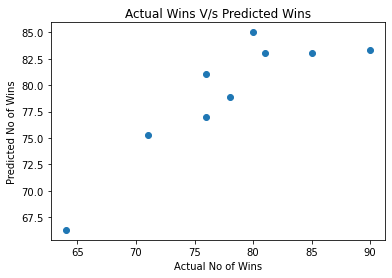

In [83]:
#Curve for actual and predicted value
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual No of Wins')
plt.ylabel('Predicted No of Wins')
plt.title('Actual Wins V/s Predicted Wins')
plt.show()